# Importing Librairies and Dataset

In [ ]:
import csv
import pandas as pd
import seaborn as sns
from glob import glob
import os
import numpy as np
from scipy import stats
import pandas as pd

In [ ]:
df=pd.read_csv('combinedCities.csv', error_bad_lines=False)

b'Skipping line 258: expected 28 fields, saw 55\nSkipping line 724: expected 28 fields, saw 55\nSkipping line 1585: expected 28 fields, saw 55\nSkipping line 2440: expected 28 fields, saw 55\nSkipping line 3295: expected 28 fields, saw 55\nSkipping line 4173: expected 28 fields, saw 55\nSkipping line 5051: expected 28 fields, saw 55\nSkipping line 6313: expected 28 fields, saw 55\nSkipping line 7426: expected 28 fields, saw 55\nSkipping line 8548: expected 28 fields, saw 55\nSkipping line 9670: expected 28 fields, saw 55\nSkipping line 10361: expected 28 fields, saw 55\nSkipping line 11052: expected 28 fields, saw 55\nSkipping line 11877: expected 28 fields, saw 55\nSkipping line 12927: expected 28 fields, saw 55\nSkipping line 13725: expected 28 fields, saw 55\nSkipping line 14677: expected 28 fields, saw 55\nSkipping line 16244: expected 28 fields, saw 55\nSkipping line 17263: expected 28 fields, saw 55\nSkipping line 17851: expected 28 fields, saw 55\nSkipping line 18439: expected 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44402 entries, 0 to 44401
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 44402 non-null  object
 1   Time                 44401 non-null  object
 2   Temp[C]              43254 non-null  object
 3   pH                   40544 non-null  object
 4   pH[mV]               40544 non-null  object
 5   ORP[mV]              40881 non-null  object
 6   EC[muS per cm]       44383 non-null  object
 7   EC Abs.[muS per cm]  42013 non-null  object
 8   RES[Ohm-cm]          42013 non-null  object
 9   TDS[ppm]             44383 non-null  object
 10  Sal.[psu]            44383 non-null  object
 11  Sigma T              42013 non-null  object
 12  Press[psi]           42013 non-null  object
 13  D.O.[percent]        40022 non-null  object
 14  D.O.[ppm]            40022 non-null  object
 15  Turb[FNU]            44383 non-null  object
 16  Ni[p

# Pre-processing and Cleaning of the Dataset

In [ ]:
df.drop(df.columns[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44402 entries, 0 to 44401
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 44402 non-null  object
 1   Time                 44401 non-null  object
 2   Temp[C]              43254 non-null  object
 3   pH                   40544 non-null  object
 4   pH[mV]               40544 non-null  object
 5   ORP[mV]              40881 non-null  object
 6   EC[muS per cm]       44383 non-null  object
 7   EC Abs.[muS per cm]  42013 non-null  object
 8   RES[Ohm-cm]          42013 non-null  object
 9   TDS[ppm]             44383 non-null  object
 10  Sal.[psu]            44383 non-null  object
 11  Sigma T              42013 non-null  object
 12  Press[psi]           42013 non-null  object
 13  D.O.[percent]        40022 non-null  object
 14  D.O.[ppm]            40022 non-null  object
 15  Turb[FNU]            44383 non-null  object
dtypes: o

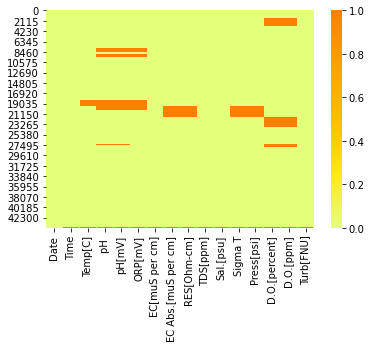

In [ ]:
sns.heatmap(df.isnull(), cbar=True, cmap="Wistia")

In [ ]:
df1=df.dropna()

In [ ]:
dataset=df1

In [ ]:
cols = dataset.select_dtypes(exclude=['float']).columns

dataset[cols] = dataset[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35103 entries, 0 to 44400
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 0 non-null      float32
 1   Time                 0 non-null      float32
 2   Temp[C]              35101 non-null  float32
 3   pH                   35101 non-null  float32
 4   pH[mV]               35101 non-null  float32
 5   ORP[mV]              35101 non-null  float32
 6   EC[muS per cm]       35101 non-null  float32
 7   EC Abs.[muS per cm]  35101 non-null  float32
 8   RES[Ohm-cm]          35101 non-null  float32
 9   TDS[ppm]             35101 non-null  float32
 10  Sal.[psu]            35101 non-null  float32
 11  Sigma T              35101 non-null  float32
 12  Press[psi]           35101 non-null  float32
 13  D.O.[percent]        35101 non-null  float32
 14  D.O.[ppm]            35101 non-null  float32
 15  Turb[FNU]            35101 non-null 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
dataset

,Date,Time,Temp[C],pH,pH[mV],ORP[mV],EC[muS per cm],EC Abs.[muS per cm],RES[Ohm-cm],TDS[ppm],Sal.[psu],Sigma T,Press[psi],D.O.[percent],D.O.[ppm],Turb[FNU]
0,NaN,NaN,22.290001,5.69,-2.800000,46.299999,289.0,274.0,3460.0,145.0,0.14,0.0,14.609,103.199997,8.96,10.2
1,NaN,NaN,22.270000,5.71,-3.800000,46.200001,289.0,274.0,3460.0,144.0,0.14,0.0,14.608,102.199997,8.88,10.3
2,NaN,NaN,22.260000,5.72,-4.600000,46.400002,289.0,274.0,3460.0,144.0,0.14,0.0,14.609,116.699997,10.15,10.5
3,NaN,NaN,22.240000,5.76,-6.600000,45.400002,289.0,274.0,3460.0,145.0,0.14,0.0,14.609,111.599998,9.71,10.7
4,NaN,NaN,22.250000,5.78,-8.100000,44.700001,290.0,275.0,3448.0,145.0,0.14,0.0,14.610,118.099998,10.27,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44396,NaN,NaN,20.480000,8.94,-106.199997,209.000000,460.0,420.0,2174.0,299.0,0.22,0.0,14.698,124.900002,11.24,12.3
44397,NaN,NaN,20.500000,8.96,-107.400002,208.500000,457.0,418.0,2188.0,297.0,0.22,0.0,14.697,125.599998,11.30,11.9
44398,NaN,NaN,20.510000,8.98,-108.300003,208.199997,455.0,417.0,2198.0,296.0,0.22,0.0,14.698,125.900002,11.32,11.8
44399,NaN,NaN,20.500000,8.95,-106.599998,208.600006,457.0,418.0,2188.0,297.0,0.22,0.0,14.700,125.699997,11.30,11.6


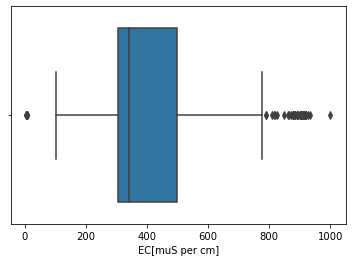

In [ ]:
sns.boxplot(x=dataset['EC[muS per cm]'])

mean of the dataset is 387.6659240722656
std. deviation is 126.4935073852539


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35049 entries, 0 to 44400
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 0 non-null      float32
 1   Time                 0 non-null      float32
 2   Temp[C]              35047 non-null  float32
 3   pH                   35047 non-null  float32
 4   pH[mV]               35047 non-null  float32
 5   ORP[mV]              35047 non-null  float32
 6   EC[muS per cm]       35047 non-null  float32
 7   EC Abs.[muS per cm]  35047 non-null  float32
 8   RES[Ohm-cm]          35047 non-null  float32
 9   TDS[ppm]             35047 non-null  float32
 10  Sal.[psu]            35047 non-null  float32
 11  Sigma T              35047 non-null  float32
 12  Press[psi]           35047 non-null  float32
 13  D.O.[percent]        35047 non-null  float32
 14  D.O.[ppm]            35047 non-null  float32
 15  Turb[FNU]            35047 non-null 

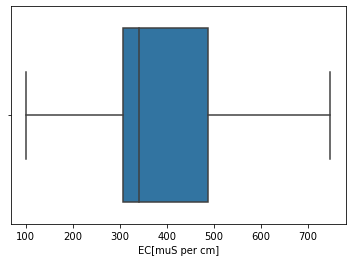

In [ ]:
mean = np.mean(dataset['EC[muS per cm]']) 
std = np.std(dataset['EC[muS per cm]'])
print('mean of the dataset is', mean) 
print('std. deviation is', std) 
threshold = -3
outlier = [] 
for i in dataset['EC[muS per cm]']: 
    z = abs((i-mean)/std)
    if z > 3: 
      dataset.drop(dataset.loc[dataset['EC[muS per cm]']==i].index, inplace=True)
      outlier.append(i)
dataset.info()
sns.boxplot(x=dataset['EC[muS per cm]'])
print(outlier)

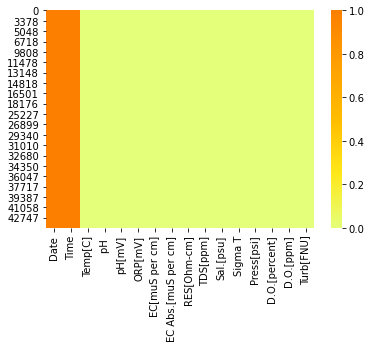

In [ ]:
sns.heatmap(dataset.isnull(), cbar=True, cmap="Wistia")

# Calculating the Water Quality Index

In [ ]:

wqi=[]
for i in range(len(dataset)) : 
    ph = float(dataset.iloc[i, 3])
    ph1 = abs(float(100*((ph-7)/1.5))) #pH
    do = float(dataset.iloc[i, 14])
    do1 = abs(100*(do-14.6)/(-9.6)) #DO
    ec = float(dataset.iloc[i, 6])
    ec1 = 100*(ec)/(250) #EC
    tds = float(dataset.iloc[i, 9])
    tds1 = 100*(tds/2000) #TDS
    temp = float(dataset.iloc[i, 2])
    temp1 = 100*temp/25 #Temp
    turb = float(dataset.iloc[i, 6])
    turb1 = 100*turb #Turbudity
    w2 = 0.050
    w3 = 0.2190
    w7 = .3710
    w9 = .037
    w14 = 0.3723
    w15 = 0.00001
    w = (w2*temp1 + w3*ph1 + w7*ec1 + w9*tds1 + w14*do1 + w15*turb1)/(w2+w3+w7+w9+w14+w15)
 
    #print(w)
    wqi.append(w)

    #dataset["weights"] = w
    #dataset["qvalues_ph"]=ph1
    #dataset.head(100)

In [ ]:
wqi

[84.72374627111915,
 84.73556345673894,
 79.9007546276749,
 80.9683293922769,
 78.7646419185306,
 82.0154213860573,
 78.85377867069982,
 81.54281197463469,
 80.26855412657525,
 80.8805239440417,
 80.48634691288207,
 77.6241900445512,
 78.96149941450295,
 80.2354919184821,
 77.47906076371997,
 76.91571827421325,
 78.33563982326478,
 77.78449258292997,
 78.53973300646656,
 77.29492641261238,
 77.20849248750395,
 77.21826062036267,
 77.72836721889458,
 76.84135660013784,
 76.2551557609085,
 77.04380254946521,
 75.04230872076789,
 74.90671625010634,
 76.03466035487422,
 75.53463162133988,
 74.81608551067126,
 75.1433034071825,
 76.01074673406465,
 75.51071800053033,
 74.6269444216619,
 74.58998476471365,
 73.2083977130707,
 73.34372819842945,
 72.6110706212012,
 73.39781135170416,
 70.78288773966581,
 72.76805783627779,
 71.75250701285545,
 71.97944802290247,
 70.27717117248456,
 70.49675066270628,
 71.75117587481083,
 73.20996313886435,
 73.81869591644251,
 72.86100302367757,
 72.25009531

In [ ]:
min(wqi)

61.597351966613274

In [ ]:
max(wqi)

163.15218179046485

In [ ]:
WQI=[]
for q in wqi:
    if q<=25:
        WQI.append("Excellent")
    elif q>25 and q<=50:
        WQI.append("Good")
    elif q>50 and q<=75:
        WQI.append("Poor")
    elif q>75 and q<=100:
        WQI.append("Very Poor")
    else :
        WQI.append("Unsuitable for drinking")
    
    
    

In [ ]:
WQI

['Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Poor',
 'Very Poor',
 'Very Poor',
 'Poor',
 'Very Poor',
 'Very Poor',
 'Very Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'P

In [ ]:
dataset["Water Quality Index"]=WQI

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset

,Date,Time,Temp[C],pH,pH[mV],ORP[mV],EC[muS per cm],EC Abs.[muS per cm],RES[Ohm-cm],TDS[ppm],Sal.[psu],Sigma T,Press[psi],D.O.[percent],D.O.[ppm],Turb[FNU],Water Quality Index
0,NaN,NaN,22.290001,5.69,-2.800000,46.299999,289.0,274.0,3460.0,145.0,0.14,0.0,14.609,103.199997,8.96,10.2,Very Poor
1,NaN,NaN,22.270000,5.71,-3.800000,46.200001,289.0,274.0,3460.0,144.0,0.14,0.0,14.608,102.199997,8.88,10.3,Very Poor
2,NaN,NaN,22.260000,5.72,-4.600000,46.400002,289.0,274.0,3460.0,144.0,0.14,0.0,14.609,116.699997,10.15,10.5,Very Poor
3,NaN,NaN,22.240000,5.76,-6.600000,45.400002,289.0,274.0,3460.0,145.0,0.14,0.0,14.609,111.599998,9.71,10.7,Very Poor
4,NaN,NaN,22.250000,5.78,-8.100000,44.700001,290.0,275.0,3448.0,145.0,0.14,0.0,14.610,118.099998,10.27,10.6,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44396,NaN,NaN,20.480000,8.94,-106.199997,209.000000,460.0,420.0,2174.0,299.0,0.22,0.0,14.698,124.900002,11.24,12.3,Unsuitable for drinking
44397,NaN,NaN,20.500000,8.96,-107.400002,208.500000,457.0,418.0,2188.0,297.0,0.22,0.0,14.697,125.599998,11.30,11.9,Unsuitable for drinking
44398,NaN,NaN,20.510000,8.98,-108.300003,208.199997,455.0,417.0,2198.0,296.0,0.22,0.0,14.698,125.900002,11.32,11.8,Unsuitable for drinking
44399,NaN,NaN,20.500000,8.95,-106.599998,208.600006,457.0,418.0,2188.0,297.0,0.22,0.0,14.700,125.699997,11.30,11.6,Unsuitable for drinking


# Importing Libraries for Machine Learning 





In [ ]:
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn import svm 

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

import multiprocessing

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np

In [ ]:
dataset=dataset[['pH ','ORP[mV]','TDS[ppm]','D.O.[ppm]','Water Quality Index']].dropna()

In [ ]:
#X1=dataset[['pH ','ORP[mV]','TDS[ppm]','D.O.[ppm]']].values
#X1=dataset[['pH ','ORP[mV]','TDS[ppm]']].values
#X1=dataset[['pH ','ORP[mV]','D.O.[ppm]']].values
X1=dataset[['ORP[mV]']].values

In [ ]:
Y=dataset[['Water Quality Index']].values

In [ ]:
X1.shape

(35047, 1)

In [ ]:

scaler=StandardScaler()

X=scaler.fit_transform(X1)


In [ ]:

from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=3, test_size=0.2,train_size=0.8 ,random_state=0)



In [ ]:

lrparams=[
    {
        'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0,10]
    }
]
  


In [ ]:

lrgs1 = GridSearchCV(estimator=LogisticRegression(n_jobs=12,multi_class='multinomial'), param_grid=lrparams,scoring="accuracy",cv=cv,n_jobs=12)

lrgs1.fit(X,Y)




GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.2, train_size=0.8),
             estimator=LogisticRegression(multi_class='multinomial', n_jobs=12),
             n_jobs=12,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}],
             scoring='accuracy')

In [ ]:
print(lrgs1.best_estimator_)
print("")
print("LR Accuracy= ",lrgs1.best_score_)


LogisticRegression(C=0.5, multi_class='multinomial', n_jobs=12, solver='saga')

LR Accuracy=  0.5807417974322396


In [ ]:
params=[
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }
]
gs = GridSearchCV(estimator=svm.SVC(), param_grid=params,scoring="accuracy",cv=cv,n_jobs=12)
gs.fit(X,Y)

print(gs.best_estimator_)

print(gs.best_score_)


In [ ]:
print("SVM Accuracy= ", gs.best_score_)
gs1.best_params_

# Importing Libraries for Deep Learning

In [ ]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
series=np.array(wqi)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(series.reshape(-1, 1) )
series = pd.DataFrame(scaled)



# Training the LSTM model

In [ ]:

window_size = 5

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

series.head()

series.shape


nrow = round(0.8*series.shape[0])


train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]

#from sklearn.utils import shuffle
#train = shuffle(train)

train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)


(28026, 5)
(28026,)
(7006, 5)
(7006,)
(28026, 5, 1)
(28026,)
(7006, 5, 1)
(7006,)


In [ ]:

model = Sequential()
model.add(LSTM(input_shape = (window_size,1), output_dim= 5, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5)              0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               68608     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 68,877
Trainable params: 68,877
Non-trainable params: 0
__________________________________________________

In [ ]:

start = time.time()
model.fit(train_X,train_y,batch_size=256,nb_epoch=5,validation_data=(test_X,test_y))
print("> Compilation Time : ", time.time() - start)





Train on 28026 samples, validate on 7006 samples
Epoch 1/5
28026/28026 [==============================] - 2s 76us/step - loss: 0.0344 - val_loss: 0.0018
Epoch 2/5
28026/28026 [==============================] - 1s 50us/step - loss: 0.0120 - val_loss: 0.0015
Epoch 3/5
28026/28026 [==============================] - 1s 48us/step - loss: 0.0113 - val_loss: 0.0015
Epoch 4/5
28026/28026 [==============================] - 1s 49us/step - loss: 0.0107 - val_loss: 0.0015
Epoch 5/5
28026/28026 [==============================] - 1s 49us/step - loss: 0.0100 - val_loss: 0.0016
> Compilation Time :  38.67997932434082


#Results

In [ ]:
preds = model.predict(test_X)
preds.shape
preds = scaler.inverse_transform(preds)
test_y.shape
actuals = scaler.inverse_transform(test_y.reshape(-1, 1))


In [ ]:

from math import sqrt

print("RMSE= ",sqrt(mean_squared_error(actuals,preds)))



RMSE=  2.032184176067496


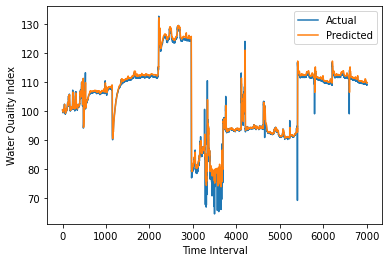

In [ ]:
pyplot.xlabel("Time Interval")
pyplot.ylabel("Water Quality Index")
pyplot.plot(actuals,label="Actual")
pyplot.plot(preds,label="Predicted")
pyplot.legend()
pyplot.show()